## Pasajeros de Avion con Facebook Prophet

In [2]:
import pandas as pd
from prophet import Prophet


Importing plotly failed. Interactive plots will not work.


In [3]:
df = pd.read_csv('./airline_passengers.csv')

In [4]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


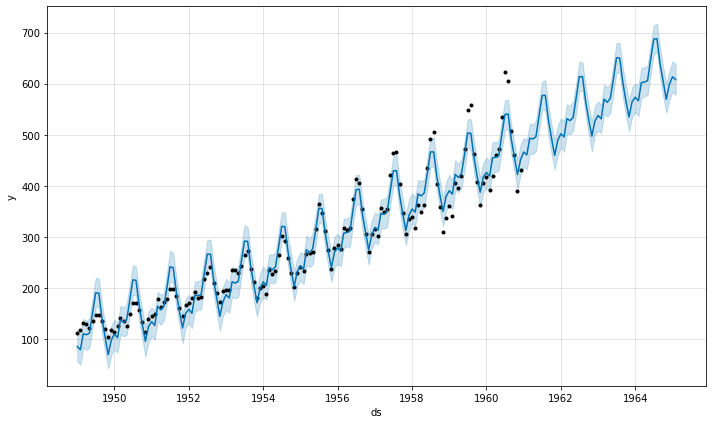

In [6]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

Esta serie temporal tiene un ciclo anual, pero la estacionalidad en el pronóstico es demasiado grande al comienzo de la serie temporal y demasiado pequeña al final. En esta serie de tiempo, la estacionalidad no es un factor aditivo constante como lo supone Prophet por defecto, sino que crece con la tendencia. Esta es la estacionalidad multiplicativa.

### Cambiamos la frecuencia a multiplicativa

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


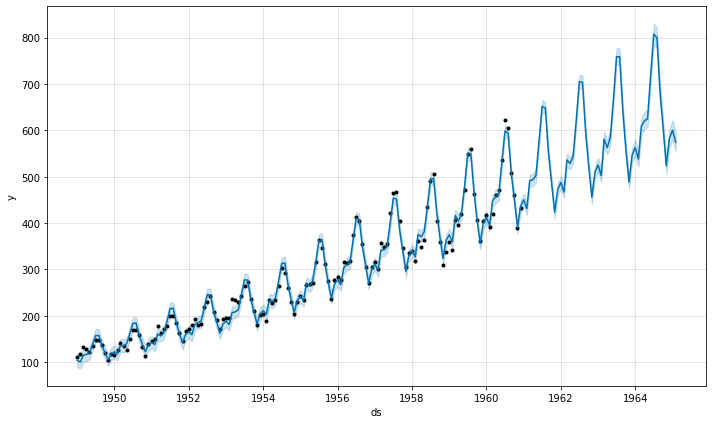

In [7]:
# Prophet tiene muchos parametros - es clave ajustarlos bien y conocerlos para no acabar con los valores por defecto

m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')

forecast = m.predict(future)
fig = m.plot(forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


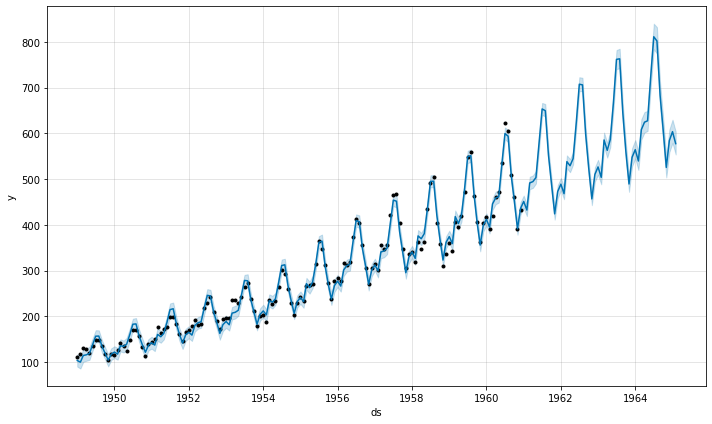

In [8]:

m= Prophet(
    seasonality_mode='multiplicative',
    n_changepoints=int(len(df) / 12),
    yearly_seasonality=True)

m.fit(df)
forecast = m.predict(future)
fig = m.plot(forecast)